In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage import io
from ipywidgets import interact, IntSlider
%matplotlib notebook

In [100]:
upi = 32
animal_name = "G405"
PATH = "/home1/bhalla/hrishikeshn/"
np.random.seed(574)
PRE_FRAME = 70
POST_FRAME = {
    'All1': 163,
    'SoAn1': 163,
    'An1': 183,
    'An2': 203,
    'An3': 223,
    'Hr7': 163,  # Will update the time for 550ms depending on the trial number chosen
    'All3': 163
}

In [101]:
def update_figure(threshold):
    for i in range(6):
        binarized = median_filtered[i] > threshold
        ax[i%2, (int(i/2)*2 + 1)].imshow(binarized, cmap="gray")
    fig.canvas.draw()

len(all_valid_trials)=60
trials=[3, 30, 58]


<IPython.core.display.Javascript object>


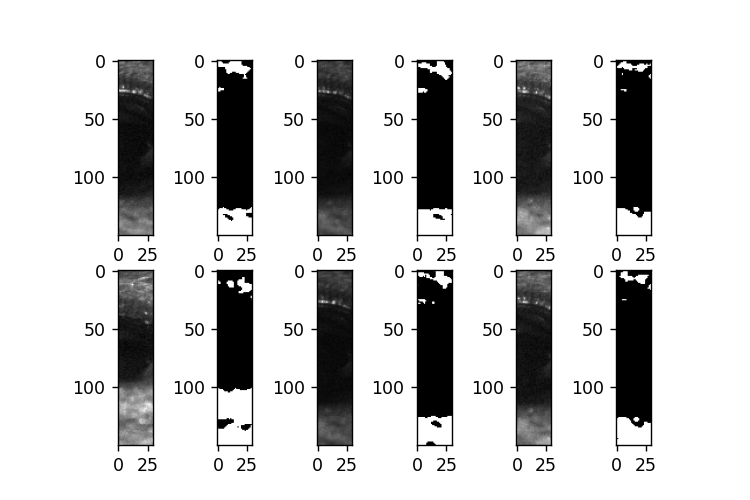

t_num=3, post_frame_num=163, session['behaviour_code']='All3'
t_num=30, post_frame_num=163, session['behaviour_code']='All3'
t_num=58, post_frame_num=163, session['behaviour_code']='All3'


interactive(children=(IntSlider(value=70, description='threshold', max=256, min=1), Output()), _dom_classes=('…

In [102]:
csv_file = f"../csv/{animal_name}.csv"
csv_data = pd.read_csv(csv_file, delimiter=",", dtype={
        'upi': int,
        'xmin:ymin': str,
        'xmax:ymax': str,
        'num_behaviour_trials': np.int64,
        'missing_behaviour_trials': str,
        'skip_behaviour_trials': str,
        'behaviour_code': str,
    },)
session = csv_data.loc[csv_data["upi"]==upi].iloc[0]
csv_error_trials = set()
if pd.notna(session['skip_behaviour_trials']):
    csv_error_trials.update([int(x) for x in session['skip_behaviour_trials'].split(';')])
if pd.notna(session['missing_behaviour_trials']):
    csv_error_trials.update(int(x) for x in session['missing_behaviour_trials'].split(';'))
if session['num_behaviour_trials'] - len(csv_error_trials) > 0:
    # read roi
    x_min, y_min = [int(i) for i in session['xmin:ymin'].split(":")]
    x_max, y_max = [int(i) for i in session['xmax:ymax'].split(":")]
    all_valid_trials = sorted(list(set(range(session['num_behaviour_trials'])) - csv_error_trials))
    num_valid_trials = len(all_valid_trials)
    print(f"{len(all_valid_trials)=}")
    trials = []
    trials.append(np.random.choice(all_valid_trials[:5]))
    trials.append(np.random.choice(all_valid_trials[int(num_valid_trials/2)-2 : int(num_valid_trials/2)+3]))
    trials.append(np.random.choice(all_valid_trials[-5:]))
    print(f"{trials=}")
    pre_frame_num = PRE_FRAME
    median_filtered = []
    fig, ax = plt.subplots(2, 6, figsize=(6, 4))
    for t, t_num in enumerate(trials):
        if (session['behaviour_code']=="Hr7") and (int((t_num-1)/5)%2 == 1):
            post_frame_num = POST_FRAME[session['behaviour_code']] + 60
        else:
            post_frame_num = POST_FRAME[session['behaviour_code']]
        print(f"{t_num=}, {post_frame_num=}, {session['behaviour_code']=}")
        behav_file_name = f"{PATH}/BehaviorRawData/{animal_name}/{animal_name}_{session['behaviour_code']}_{session['upi']}/{t_num:03}.tiff"
        frame_stack = io.imread(behav_file_name)
        eye_roi = frame_stack[pre_frame_num][y_min:y_max, x_min:x_max]
        median_filtered.append(cv2.medianBlur(eye_roi, 5))
        ax[0, t*2].imshow(eye_roi, cmap="gray")
        ax[0, t*2 + 1].imshow(eye_roi>70, cmap="gray")
        eye_roi = frame_stack[post_frame_num][y_min:y_max, x_min:x_max]
        median_filtered.append(cv2.medianBlur(eye_roi, 5))
        ax[1, t*2].imshow(eye_roi, cmap="gray")
        ax[1, t*2 + 1].imshow(eye_roi>70, cmap="gray")

    interact(update_figure, threshold=IntSlider(min=1,max=256,step=1,value=70)) 
else:
    print(f"No valid trials found to plot for session: {session['date']}_{session['behaviour_code']}")